## Explore data: Hous pricing project

* Numerical values outliers (hist+ bar plot+ dataframe subsetting)
* Correlation
https://www.kaggle.com/code/ashvanths/complete-eda-and-feature-engineering/notebook?scriptVersionId=99226383


Outdated: https://www.kaggle.com/code/fedi1996/house-prices-data-cleaning-viz-and-modeling

https://www.youtube.com/watch?v=OY4eQrekQvs
https://www.youtube.com/watch?v=rdfbcdP75KI&list=PLeo1K3hjS3uu7clOTtwsp94PcHbzqpAdg

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train=pd.read_csv('../data/house-prices-advanced-regression-techniques/train.csv')
print('train size={}'.format(data_train.shape))

data_test=pd.read_csv('../data/house-prices-advanced-regression-techniques/test.csv')
print('train test={}'.format(data_test.shape))

train size=(1460, 81)
train test=(1459, 80)


In [3]:
data_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Target variable

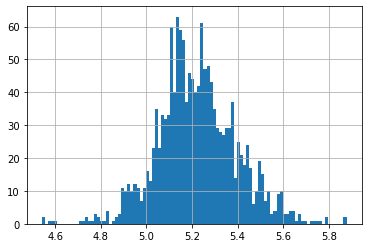

In [5]:
np.log10(data_train['SalePrice']).hist(bins=100);

In [6]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Misssing Values

columns with > 0.90 missing values
['PoolQC', 'MiscFeature', 'Alley']

In [7]:
missing_ratio=data_train.isnull().sum()/data_train.shape[0]
missing_ratio[missing_ratio>=0.90]

Alley          0.937671
PoolQC         0.995205
MiscFeature    0.963014
dtype: float64

In [8]:
missing_ratio[missing_ratio>=0.90].index.values

array(['Alley', 'PoolQC', 'MiscFeature'], dtype=object)

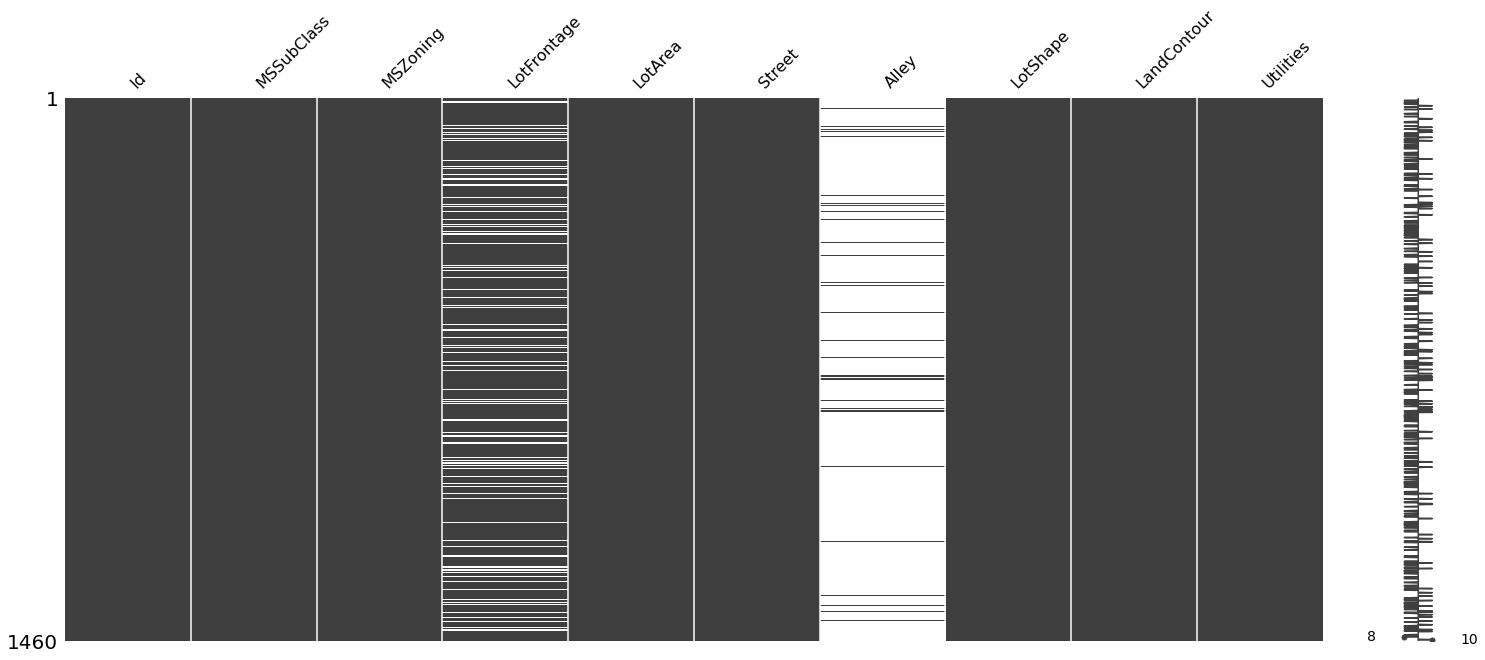

In [9]:
import missingno as msno
msno.matrix(data_train[missing_ratio.index[:10]]);

##  Devide data to the categorical and numerical columns

In [10]:
numerical_columns =data_train.select_dtypes(include=[np.number])
object_columns = data_train.select_dtypes(include=['object'])

## Numerical values
Non informative features.Most of the values present (see the 75 quantile below) in these variables are 0, thus these features can be cleared during the data preprocessing step.
['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [11]:
#numerical_columns.drop('Id',axis=1,inplace=True)
numerical_columns.describe().T.sort_values(by='std')

,count,mean,std,min,25%,50%,75%,max
KitchenAbvGr,1460.0,1.046575,0.220338,0.0,1.00,1.0,1.00,3.0
BsmtHalfBath,1460.0,0.057534,0.238753,0.0,0.00,0.0,0.00,2.0
HalfBath,1460.0,0.382877,0.502885,0.0,0.00,0.0,1.00,2.0
BsmtFullBath,1460.0,0.425342,0.518911,0.0,0.00,0.0,1.00,3.0
FullBath,1460.0,1.565068,0.550916,0.0,1.00,2.0,2.00,3.0
Fireplaces,1460.0,0.613014,0.644666,0.0,0.00,1.0,1.00,3.0
GarageCars,1460.0,1.767123,0.747315,0.0,1.00,2.0,2.00,4.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.00,3.0,3.00,8.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YrSold,1460.0,2007.815753,1.328095,2006.0,2007.00,2008.0,2009.00,2010.0


In [12]:
list_drop=['Id','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
numerical_columns=numerical_columns.drop(list_drop,axis=1)

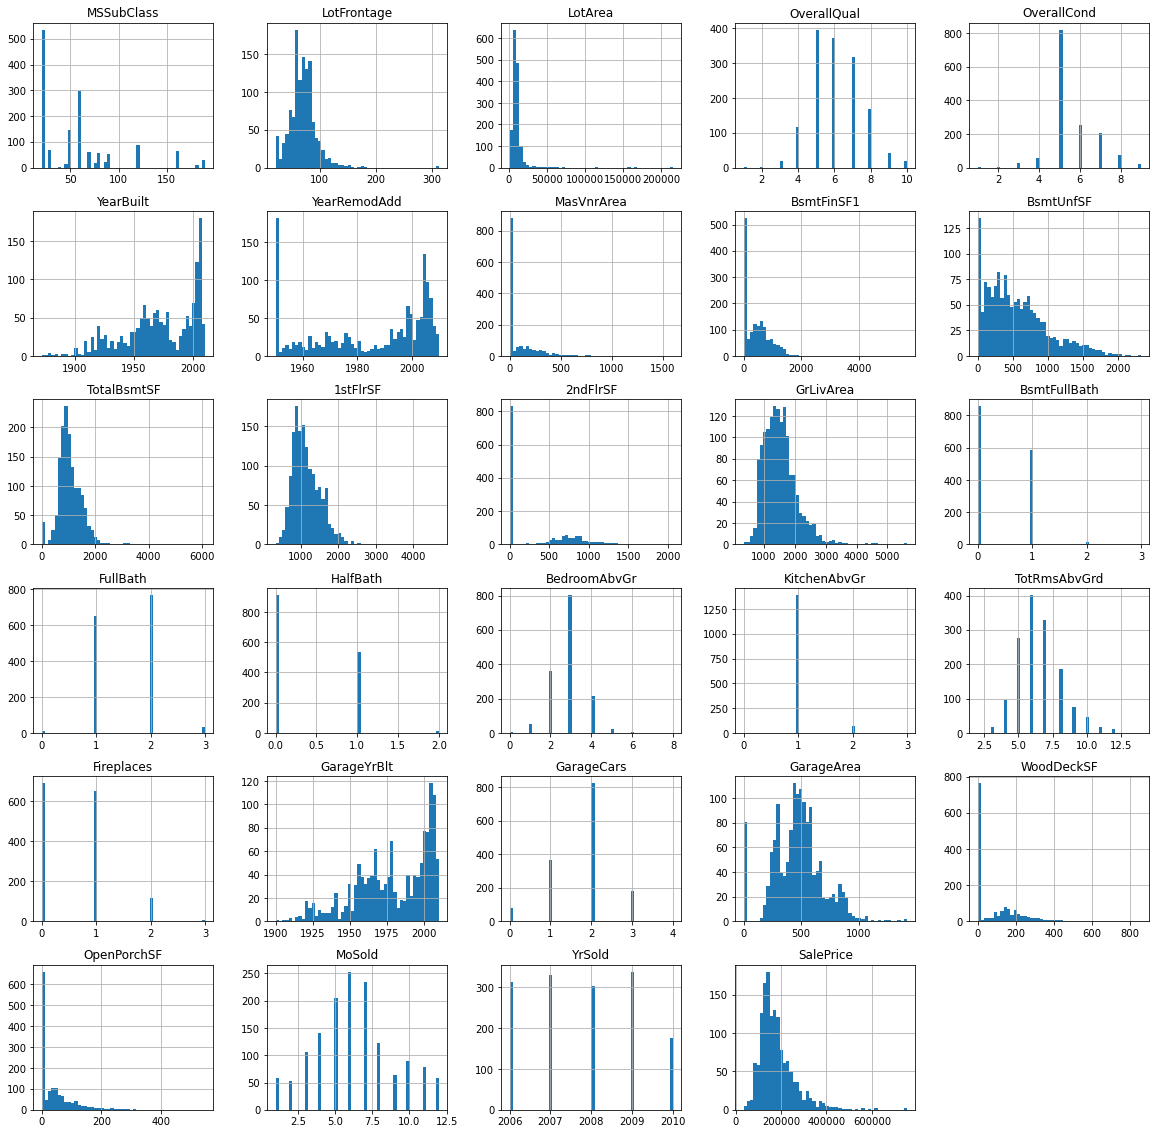

In [13]:
numerical_columns.hist(bins=50,figsize=(20,20));

###  Numerical value Outliers

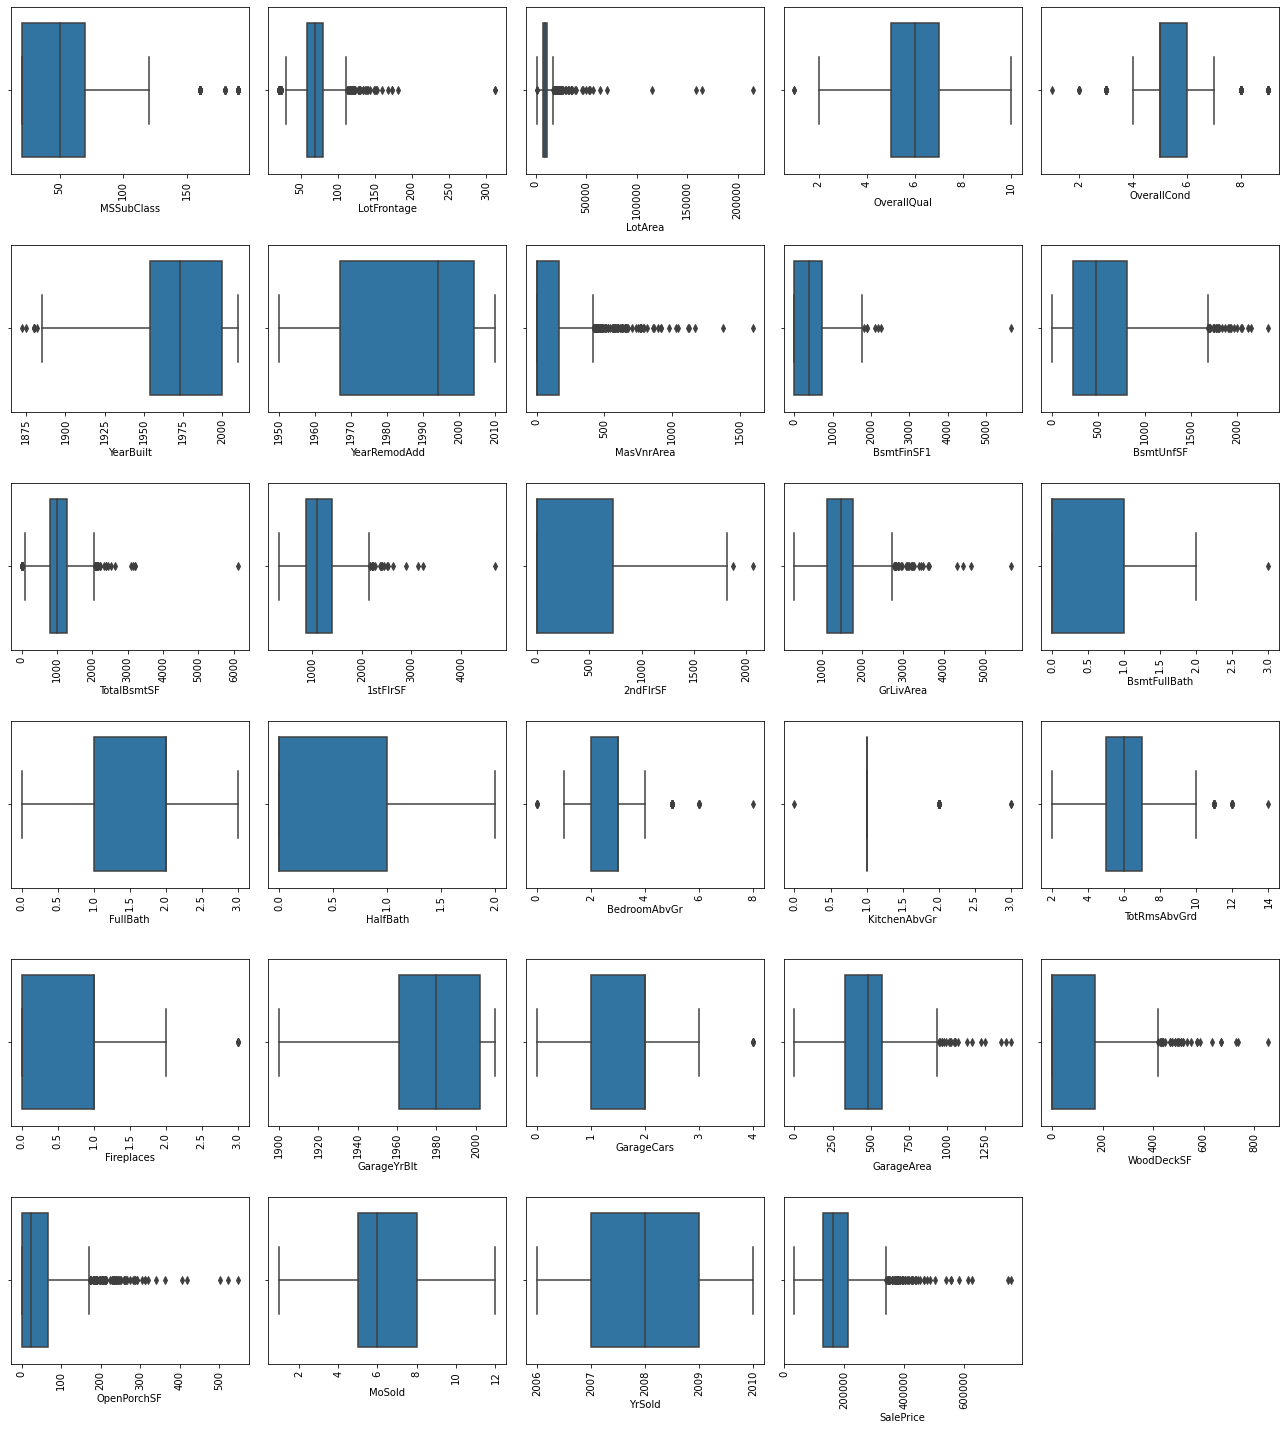

In [14]:
fig = plt.figure(figsize=(18,20))
#numerical_columns.drop(['Id','MSSubClass'],axis=1,inplace=True)
for index in range(len(numerical_columns.columns)):
    plt.subplot(6,5,index+1)
    sns.boxplot(x=numerical_columns.iloc[:,index], data=numerical_columns.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.2)

## Categorical values

inbalance classes ratio>90% 

In [15]:
object_columns['MSSubClass']=data_train['MSSubClass'].astype('str').values

<ipython-input-15-6ee3f5ad4a15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_columns['MSSubClass']=data_train['MSSubClass'].astype('str').values


In [16]:
inbalance_classes=[]
for col in object_columns.columns:
    big_class_ratio=object_columns[col].value_counts(normalize=True).iloc[0]
    if (big_class_ratio>=0.90):
        print("{}              {:.4f}".format(col,big_class_ratio))
        inbalance_classes.append(col)  

Street              0.9959
Utilities              0.9993
LandSlope              0.9466
Condition2              0.9897
RoofMatl              0.9822
BsmtCond              0.9213
Heating              0.9781
CentralAir              0.9349
Electrical              0.9143
Functional              0.9315
GarageQual              0.9507
GarageCond              0.9616
PavedDrive              0.9178
MiscFeature              0.9074


In [17]:
inbalance_classes

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'BsmtCond',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MiscFeature']

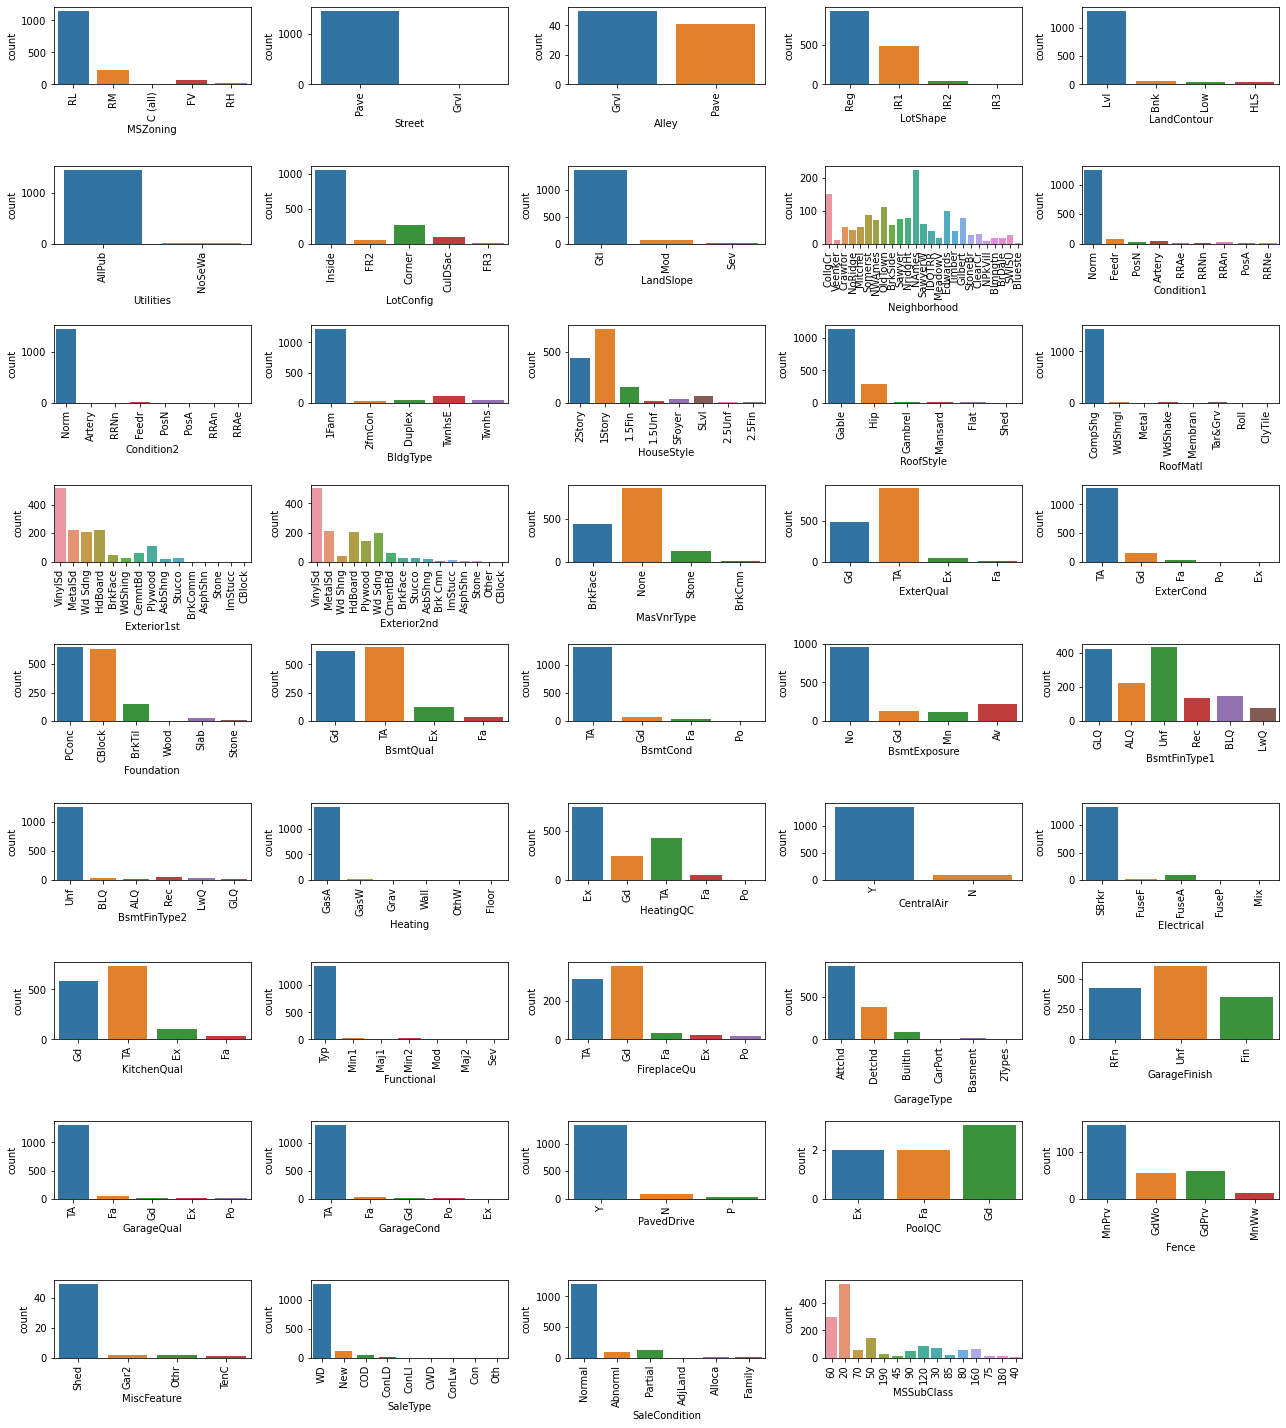

In [18]:
fig = plt.figure(figsize=(18,20))
for index in range(len(object_columns.columns)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=object_columns.iloc[:,index], data=object_columns.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.2)

# Correlations 

<AxesSubplot:>

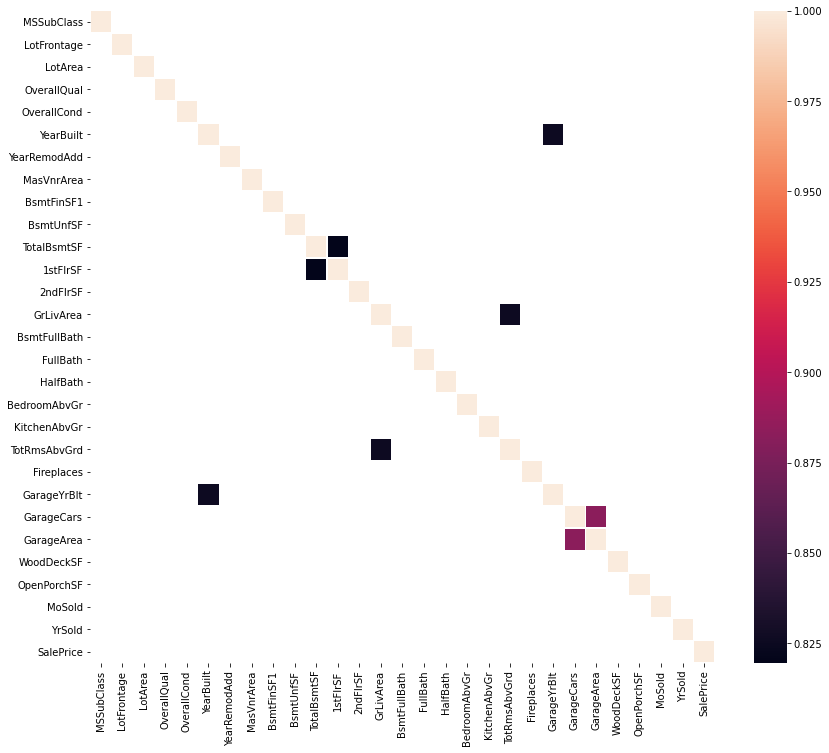

In [19]:
plt.figure(figsize=(14,12))
correlation = numerical_columns.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5)

Highly correlated features
* 'YearBuilt','GarageYrBlt'
* 'GarageCars','GarageArea'
* 'TotRmsAbvGrd','GrLivArea'
* 'TotalBsmtSF','1stFlrSF'


GrLivArea: Above grade (ground) living area square feet
1stFlrSF: First Floor square feet

In [20]:
nfeatures_corr = numerical_columns.corr()['SalePrice'][:-1]
high_corr_featurelist = nfeatures_corr[abs(nfeatures_corr)> 0.5].sort_values(ascending=False)
print("HIGHLY CORRELATED FEATURES:\n")
print(high_corr_featurelist)

HIGHLY CORRELATED FEATURES:

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


<AxesSubplot:>

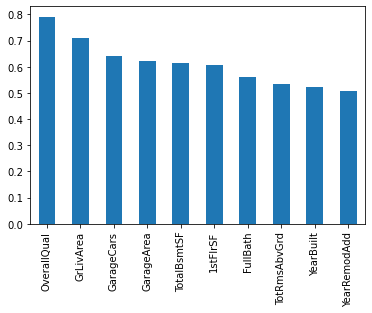

In [21]:
high_corr_featurelist.plot(kind='bar')

 scatter plot of each variable vs Sale price

In [22]:
high_corr_featurelist=nfeatures_corr.sort_values(ascending=False)

In [23]:
high_corr_featurelist.shape

(28,)

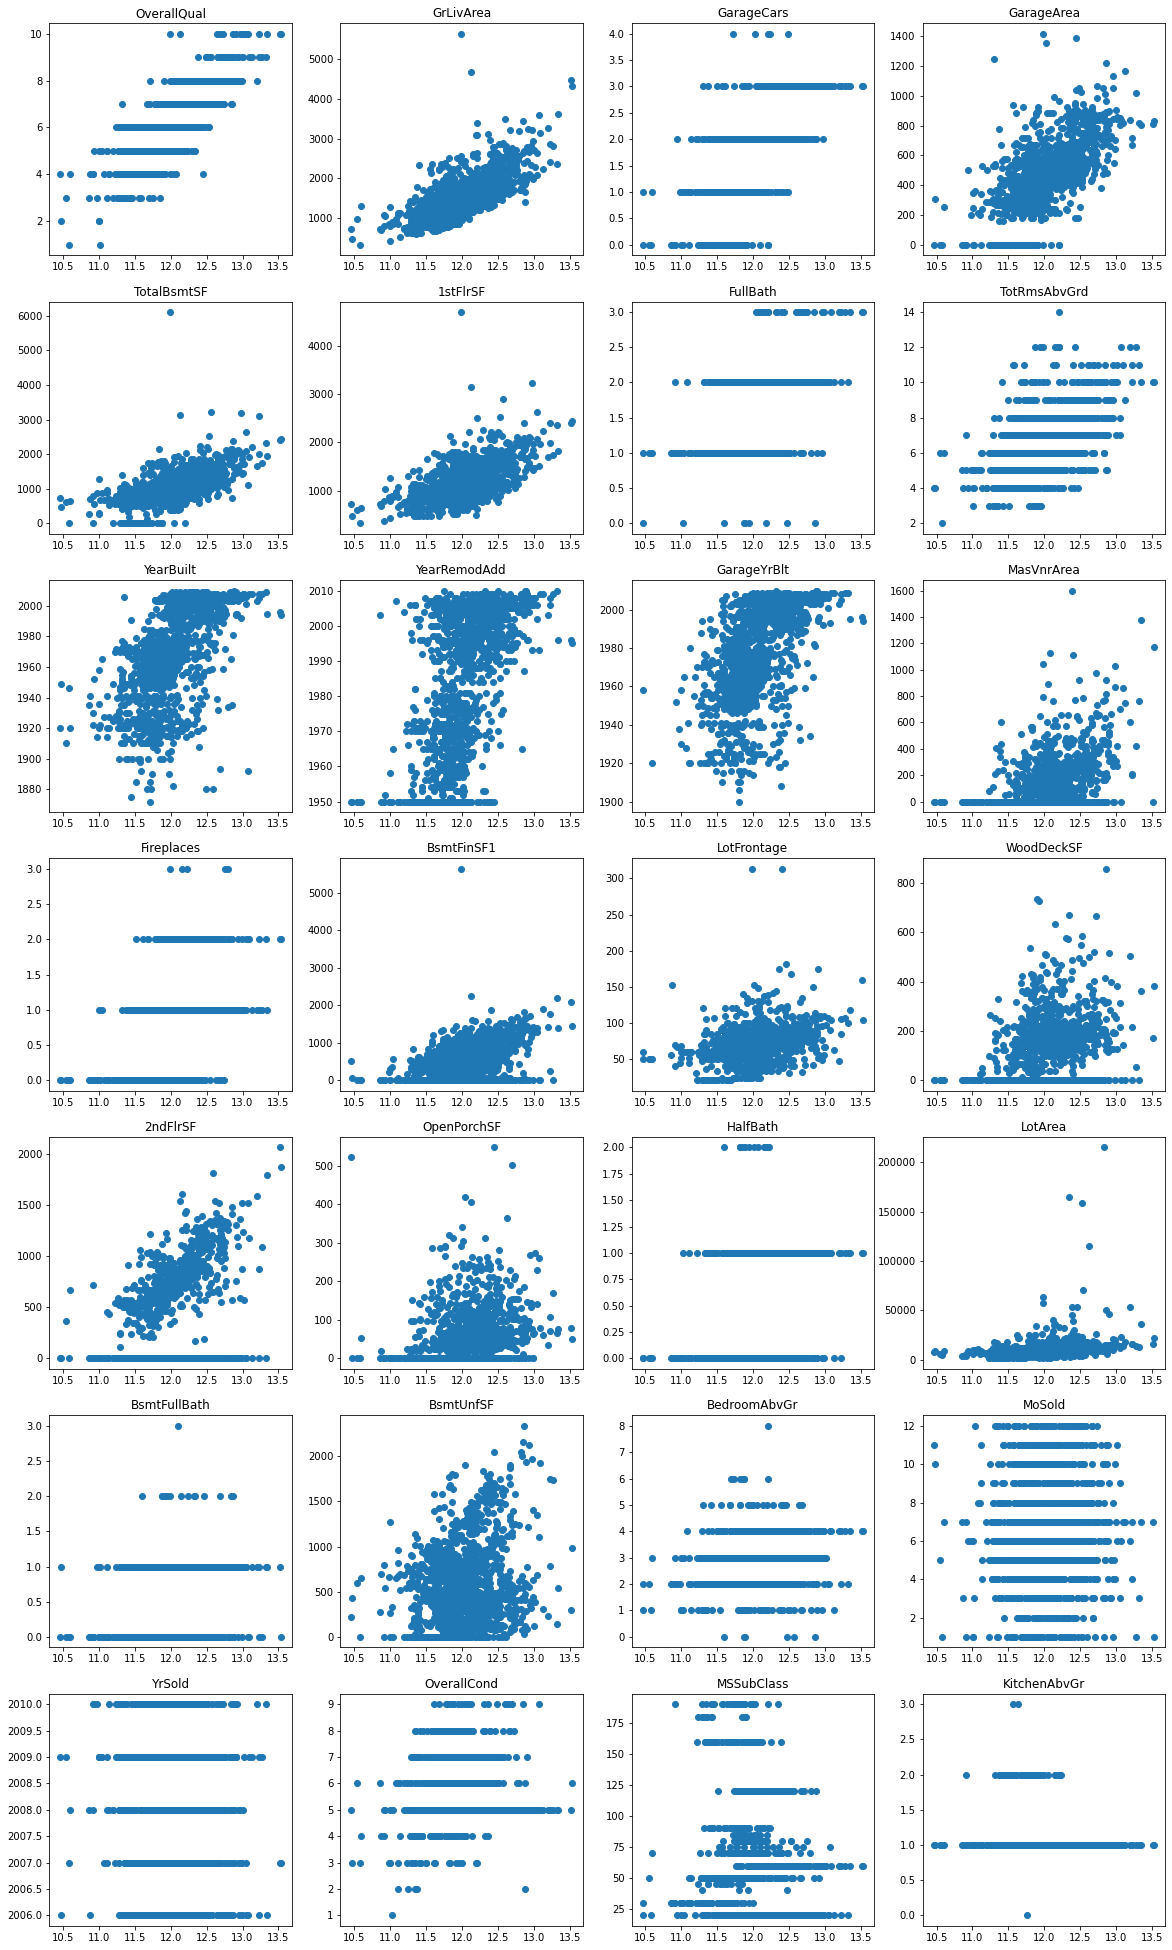

In [24]:
fig,ax=plt.subplots(nrows=7,ncols=4,figsize=(20,35))
axx=ax.flatten()

for counter,axx_c in enumerate(axx):
    col_name=high_corr_featurelist.index[counter]
    axx_c.scatter(np.log(numerical_columns['SalePrice']),numerical_columns[col_name])
    axx_c.set_title(col_name)

Some features have a lot of 0 values, it means absence of the value for particular house

# Categorical value and 'SalePrice'

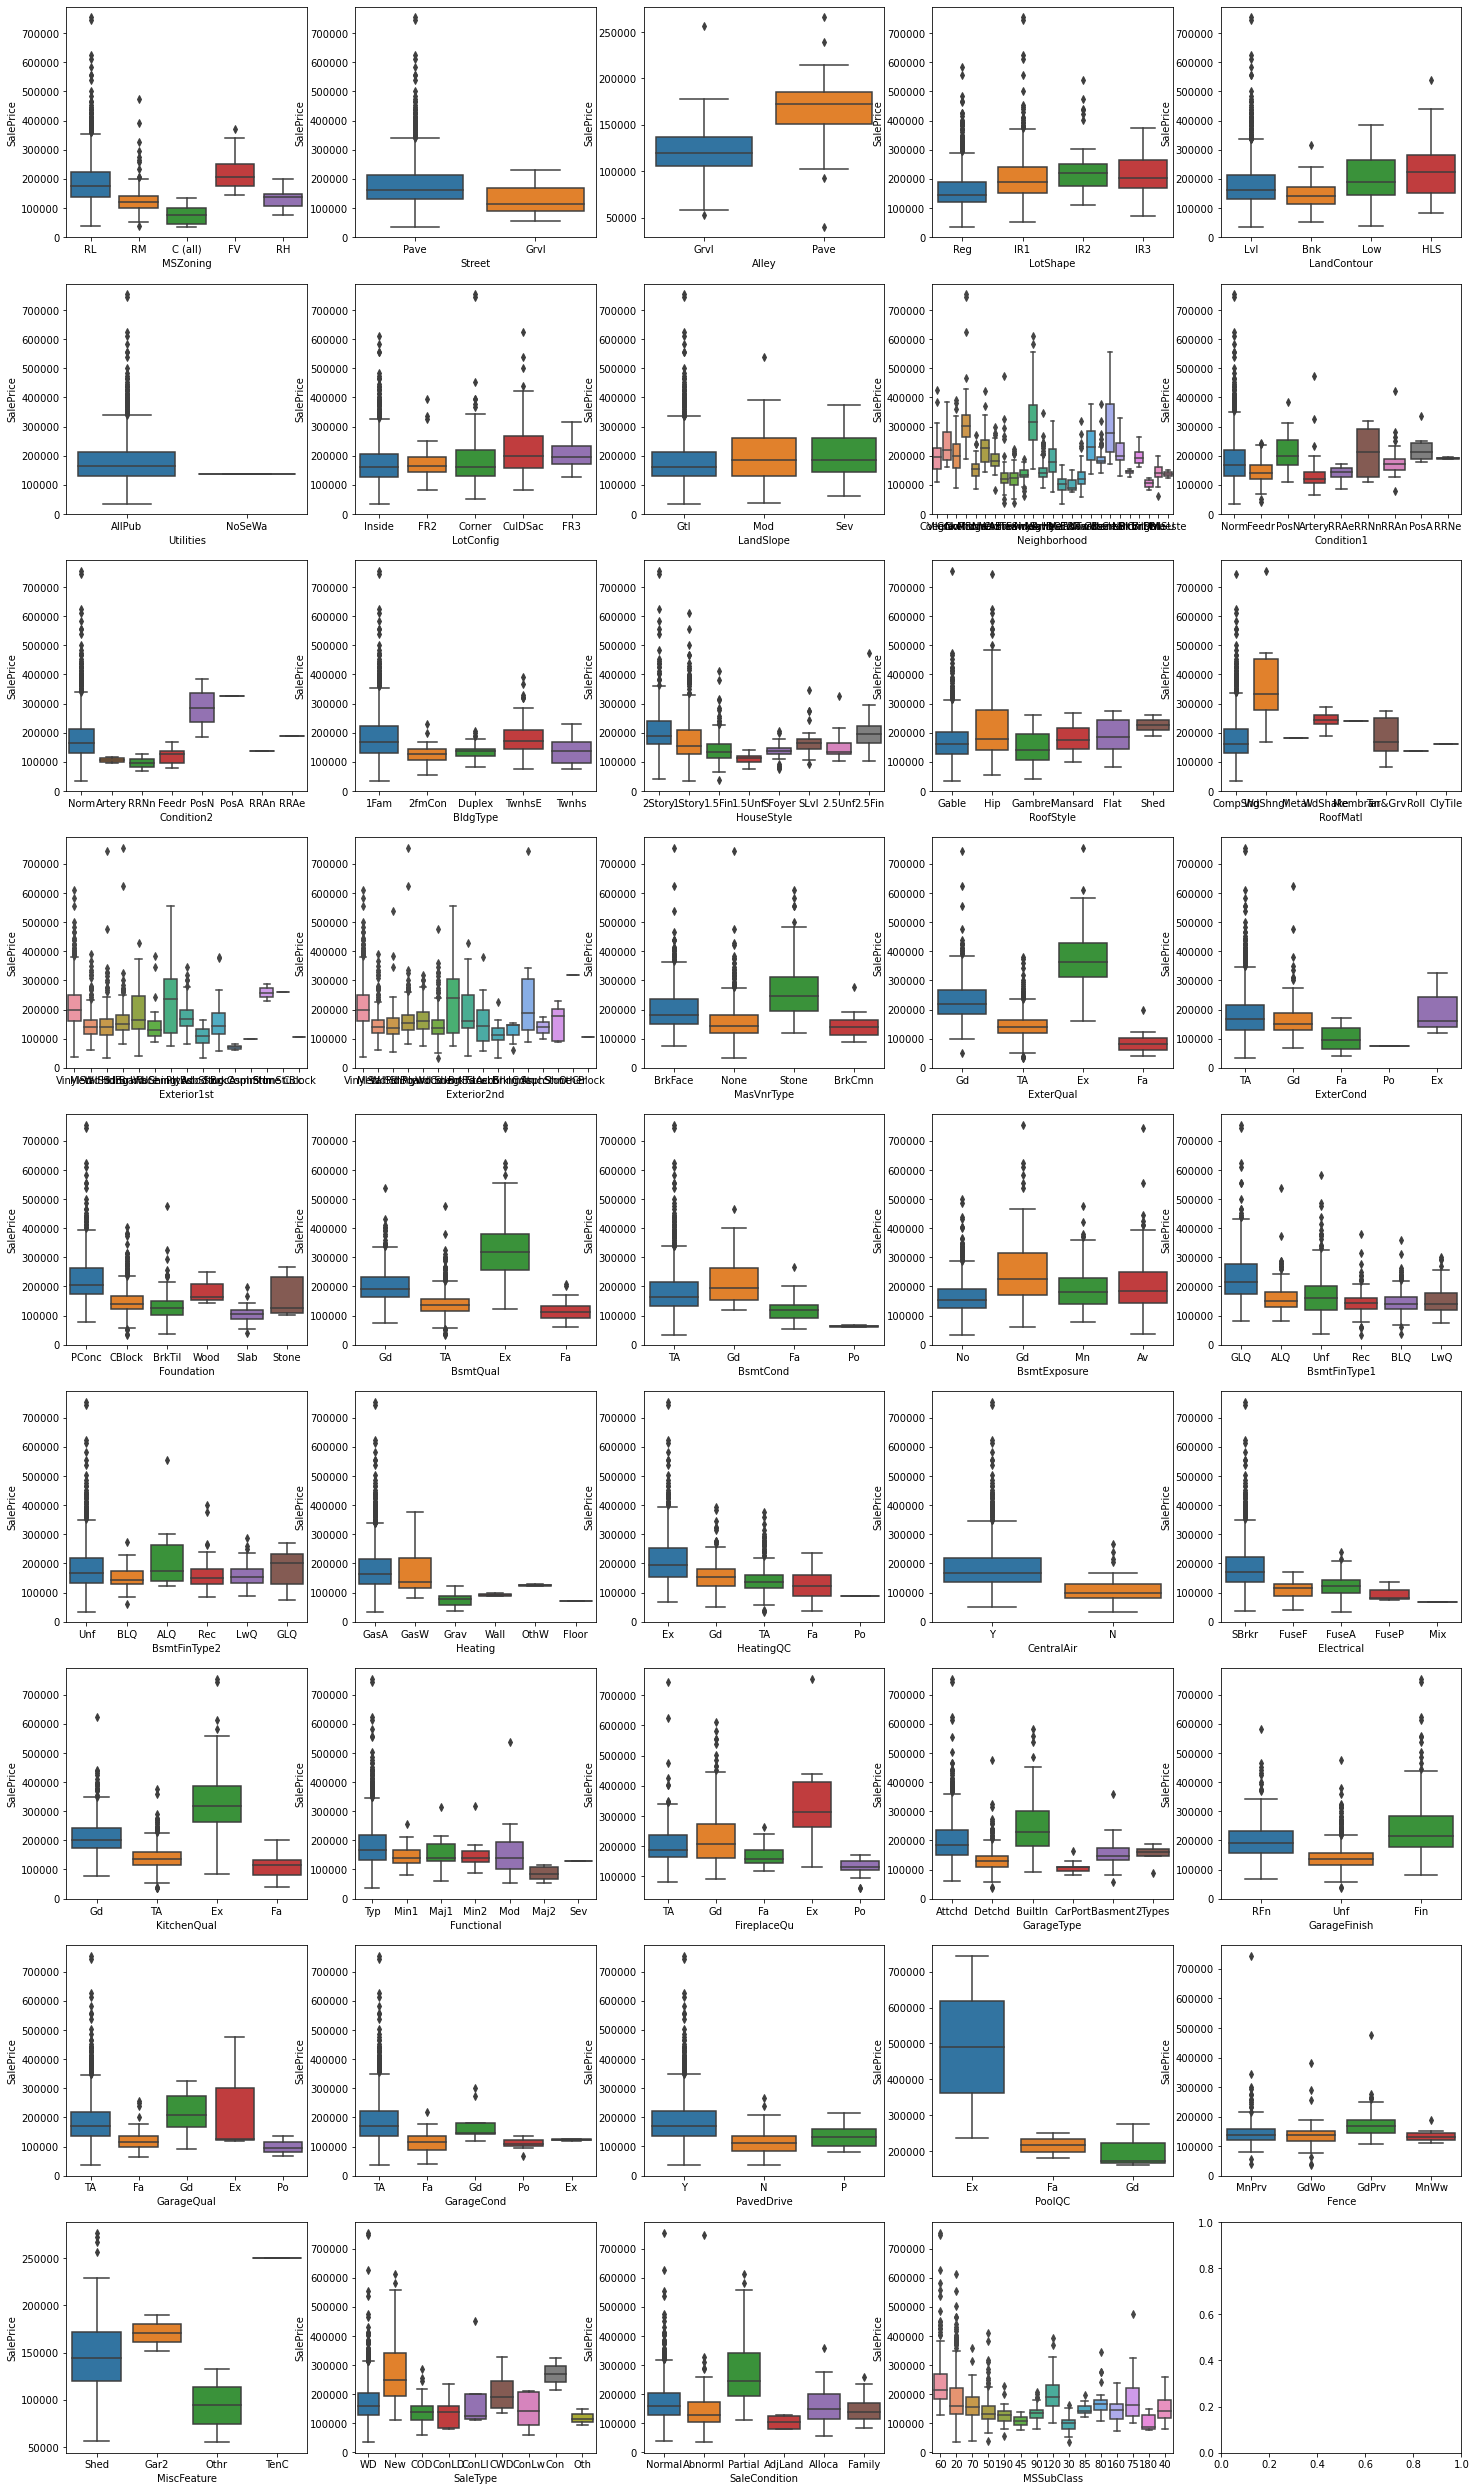

In [34]:
fig,ax=plt.subplots(nrows=9,ncols=5,figsize=(25,45))
#object_columns_=object_columns.drop(inbalance_classes,axis=0)
object_vs_price=pd.concat([object_columns,numerical_columns['SalePrice']],axis=1)
axx=ax.flatten()

for counter,axx_c in enumerate(axx):
    if counter<len(object_columns.columns):
        col_name=object_columns.columns[counter]
        sns.boxplot(x=col_name, y="SalePrice", data=object_vs_price,ax=axx_c)
#     object_columns.groupby(col)['SalePrice']
#     axx_c.barplot(object_columns['SalePrice'],object_columns[col_name])
#     axx_c.set_title(col_name)